In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
def termalizar(Terma,Ei,L,mu,T,kb): #hago montecarlo Terma veces para llegar a un seudoequilibrio, esto deberia hacerlo antes de buscar el promedio del recubirmiento para cada potencial 
    for i in range (Terma):
        for j in range (L*L): #montecarlo
            L = Ei.shape[0] 
            M = L*L
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            Epriv = epsi*(Ei[(x-1),y]+Ei[x,(y-1)]+Ei[(x+1)%L,y]+Ei[x,(y+1)%L])
            if Ei[x,y] == 1: #intento desorber
                p = np.random.rand(1)
                Pdes = np.exp((-mu+Epriv)/kb*T)              
                if p < (Pdes):
                    Ei[x,y]=0
              
 
            else: #intento adsorber
                p = np.random.rand(1)
                Pads = np.exp((mu-Epriv)/kb*T)
                if p < (Pads):
                    Ei[x,y] = 1
            
 
    Efterma = Ei #Estado luego de termalizar

    return Efterma

In [3]:
def Equilibrio(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMS=0 #tiene q volver a cero cuando cambio de pontencial
    for i in range (Equi):  
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0] 
            M = L*L 
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            Epriv = epsi*(Efterma[(x-1),y]+Efterma[x,(y-1)]+Efterma[(x+1)%L,y]+Efterma[x,(y+1)%L])
            if Efterma[x,y] == 1: #intento desorber
                p = np.random.uniform(0,1)
                Pdes = np.exp(-mu+Epriv/kb*T)              
                if p < (Pdes):
                    Efterma[x,y]=0
                
 
            else: #intento adsorber
                p = np.random.uniform(0,1)
                Pads = np.exp(mu-Epriv/kb*T)
                if p < (Pads):
                    Efterma[x,y] = 1
                    
        E_equi=Efterma        
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        recuM=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        
        if recuM != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMS =+ recuM
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
    
    
    recuP=recuMS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    return recuP,E_equi

In [4]:
%%time
L = 20 #tamaño de la malla LxL
mui = -5
muf = 10
dmu = 1
Terma = 1000
Equi = 10000
T=1
kb=1
Ei = np.zeros((L, L)) #estado incila vacío
Potenciales=[]
potenciales=np.linspace(-5, 10, 31)

Recubrimientoatrac=[]
epsi=-0.7
for mu in potenciales:
    Efterma=termalizar(Terma,Ei,L,mu,T,kb)
    recuPa,E_equi=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Ei=E_equi
    
    
    Potenciales.append(mu)
    Recubrimientoatrac.append(recuPa)

Ei = np.zeros((L, L))
Recubrimientorepul=[]
epsi=0.7    
for mu in potenciales:
    Efterma=termalizar(Terma,Ei,L,mu,T,kb)
    recuPr,E_equi=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Ei=E_equi
    
    
    
    Recubrimientorepul.append(recuPr)  


CPU times: user 1h 4min 50s, sys: 1min 34s, total: 1h 6min 25s
Wall time: 1h 5min 8s


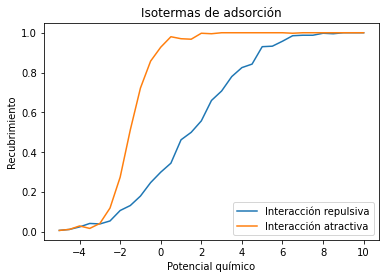

In [5]:
plt.plot(Potenciales,Recubrimientorepul, label = 'Interacción repulsiva')
plt.plot(Potenciales,Recubrimientoatrac, label = 'Interacción atractiva')
plt.title('Isotermas de adsorción')
plt.ylabel('Recubrimiento')
plt.xlabel('Potencial químico')
plt.legend()
plt.show()